![](logoUdelS.png)

<div style="text-align: center">

## Doctorado en Sistemas Computacionales

### Seminario de Investigacion II

## Asesor:
### Dr. Rigoberto Flores López


## Alumno:
### RODRIGUEZ RIVAS JOSE GABRIEL
  
</br>

   
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium

In [3]:
# cargar en dataframe el archivo de Información referente  a casos COVID-19 en México,
# El archivo se descargo del portal de datos abiertos del gobierno de Mexico,
# Disponible en la URL  https://datos.gob.mx/busca/dataset/informacion-referente-a-casos-covid-19-en-mexico

df=pd.read_csv('201231COVID19MEXICO.csv', encoding = "ISO-8859-1")

# Obtener el numero de registros y de variables (columnas)
df.shape

# Al 14 de Ocubre son 2,127,667  Casos analizados para COVID

(3628951, 40)

In [4]:
# Visualizamos los primeros 5 registros para ver el contenido
df.head()

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,OTRO_CASO,TOMA_MUESTRA_LAB,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2020-12-31,14126d,2,4,23,2,23,23,5,1,...,1,1,1,2,97,3,99,MÃ©xico,97,97
1,2020-12-31,1b0c85,2,4,5,1,24,5,30,1,...,1,1,1,2,97,3,99,MÃ©xico,97,97
2,2020-12-31,102b48,1,4,3,2,14,3,8,1,...,1,1,1,2,97,3,99,MÃ©xico,97,97
3,2020-12-31,0386e9,1,12,12,2,12,12,29,2,...,2,1,1,2,97,3,99,MÃ©xico,97,1
4,2020-12-31,08f49d,2,6,9,2,9,9,2,2,...,2,1,1,2,97,3,99,MÃ©xico,97,2


In [5]:
# Mostrar informacion de las variables (columnas) del conjunto de 
# datos del COVID
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3628951 entries, 0 to 3628950
Data columns (total 40 columns):
FECHA_ACTUALIZACION      object
ID_REGISTRO              object
ORIGEN                   int64
SECTOR                   int64
ENTIDAD_UM               int64
SEXO                     int64
ENTIDAD_NAC              int64
ENTIDAD_RES              int64
MUNICIPIO_RES            int64
TIPO_PACIENTE            int64
FECHA_INGRESO            object
FECHA_SINTOMAS           object
FECHA_DEF                object
INTUBADO                 int64
NEUMONIA                 int64
EDAD                     int64
NACIONALIDAD             int64
EMBARAZO                 int64
HABLA_LENGUA_INDIG       int64
INDIGENA                 int64
DIABETES                 int64
EPOC                     int64
ASMA                     int64
INMUSUPR                 int64
HIPERTENSION             int64
OTRA_COM                 int64
CARDIOVASCULAR           int64
OBESIDAD                 int64
RENAL_CRONICA 

In [6]:
# Eliminamos las columnas que no son de nuestro interes
df.drop(['FECHA_ACTUALIZACION','ID_REGISTRO','ENTIDAD_RES','MUNICIPIO_RES', 'ENTIDAD_UM',
               'HABLA_LENGUA_INDIG','INDIGENA', 'MIGRANTE', 'PAIS_NACIONALIDAD','PAIS_ORIGEN',
               'OTRO_CASO'],axis=1,inplace=True)


In [7]:
# Visualizamos nuevamente  los primeros 5 registros para ver el cambio realizado
df.head()

,ORIGEN,SECTOR,SEXO,ENTIDAD_NAC,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,NEUMONIA,...,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,TOMA_MUESTRA_LAB,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,UCI
0,2,4,2,23,1,2020-03-30,2020-03-20,9999-99-99,97,2,...,2,2,2,2,1,1,2,97,3,97
1,2,4,1,24,1,2020-04-03,2020-03-30,9999-99-99,97,2,...,2,2,2,2,1,1,2,97,3,97
2,1,4,2,14,1,2020-04-07,2020-03-30,9999-99-99,97,2,...,2,2,2,2,1,1,2,97,3,97
3,1,12,2,12,2,2020-03-31,2020-03-24,2020-04-04,1,1,...,2,2,2,2,1,1,2,97,3,1
4,2,6,2,9,2,2020-04-01,2020-03-26,9999-99-99,2,2,...,2,2,2,2,1,1,2,97,3,2


In [8]:
# Nuevamente verificamos la informacion para asegurarnos de que se haya borrado
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3628951 entries, 0 to 3628950
Data columns (total 29 columns):
ORIGEN                   int64
SECTOR                   int64
SEXO                     int64
ENTIDAD_NAC              int64
TIPO_PACIENTE            int64
FECHA_INGRESO            object
FECHA_SINTOMAS           object
FECHA_DEF                object
INTUBADO                 int64
NEUMONIA                 int64
EDAD                     int64
NACIONALIDAD             int64
EMBARAZO                 int64
DIABETES                 int64
EPOC                     int64
ASMA                     int64
INMUSUPR                 int64
HIPERTENSION             int64
OTRA_COM                 int64
CARDIOVASCULAR           int64
OBESIDAD                 int64
RENAL_CRONICA            int64
TABAQUISMO               int64
TOMA_MUESTRA_LAB         int64
RESULTADO_LAB            int64
TOMA_MUESTRA_ANTIGENO    int64
RESULTADO_ANTIGENO       int64
CLASIFICACION_FINAL      int64
UCI             

In [9]:
# con la funcion value_counts contamos cuantos casos hay de cada posible resultado
resultados = df['RESULTADO_LAB'].value_counts(sort=False)

#Con un diccionario de datos ponemos etiquetas a los codigos en base a los valores usados en el
# catalogo,  disponible en      https://www.gob.mx/salud/documentos/datos-abiertos-152127 

resultados.rename({1: 'Positivos', 2: 'Negativos', 3: 'Pendientes de entregar resultado', 
                   4:'Resultado No Adecuado', 97:'No Aplica (Caso sin muestra)'}, inplace=True)

resultados.sort_values(ascending=True, inplace=True)
resultados

Pendientes de entregar resultado      43446
Resultado No Adecuado                149837
No Aplica (Caso sin muestra)         595270
Positivos                           1283224
Negativos                           1557174
Name: RESULTADO_LAB, dtype: int64

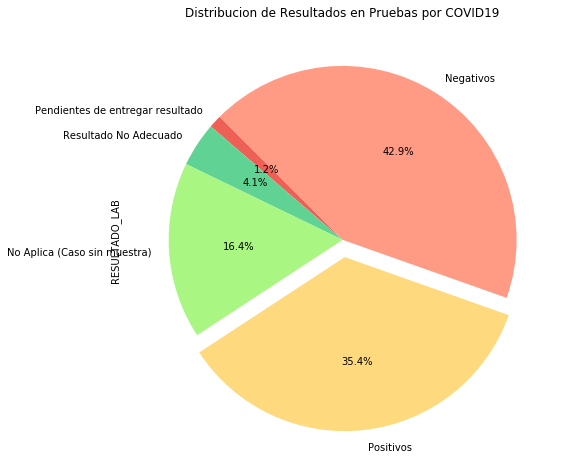

In [120]:
colores = ["#EE6055","#60D394","#AAF683","#FFD97D","#FF9B85"]
desfase = (0, 0, 0, 0.1, 0)
resultados.plot(kind='pie',figsize=(8,8), autopct='%1.1f%%', colors=colores,
               explode=desfase, startangle=135)

plt.title('Distribucion de Resultados en Pruebas por COVID19')
#plt.legend(labels=resultados.index,loc='upper right')

plt.show()

In [11]:
#  verificamos la distribucion de los casos por genero 
generos = df['SEXO'].value_counts(sort=False)

# Con un diccionario de datos ponemos etiquetas a los codigos en base a los valores usados en el
# catalogo,  disponible en      https://www.gob.mx/salud/documentos/datos-abiertos-152127 
generos.rename({1: 'Mujer', 2: 'Hombre', 99:'No Especificado '}, inplace=True)
generos

# De los 2,127,667  Casos analizados, 1,087,686 son Mujeres y  1,039,981 son Hombres

Mujer     1879076
Hombre    1749875
Name: SEXO, dtype: int64

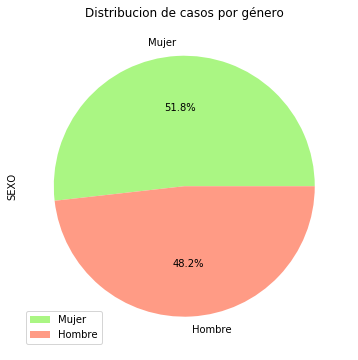

In [139]:
colores = ["#AAF683","#FF9B85"]
generos.plot(kind='pie',figsize=(10,6), autopct='%1.1f%%', colors=colores)
plt.title('Distribucion de casos por género')
lab = str(generos.index) + str(generos.values)
plt.legend(labels=generos.index,loc='lower left')
plt.show()


## Creamos otro dataframe con los casos positivos 

In [13]:
#Filtro para obtener casos positivos covid y los poonemos en un nuevo dataframe
df_covid_positivos = df['RESULTADO_LAB']==1
df_covid_positivos = df[df_covid_positivos]
len(df_covid_positivos)

# Obtenemos 805,512 casos positivos a COVID

1283224

In [14]:
positivos = df_covid_positivos['SEXO'].value_counts(sort=False)

#Con un diccionario de datos ponemos etiquetas a los codigos en base a los valores usados en el
# catalogo,  disponible en      https://www.gob.mx/salud/documentos/datos-abiertos-152127 
positivos.rename({1: 'Mujer', 2: 'Hombre', 99:'No Especificado '}, inplace=True)
positivos

# Como resultado se obtiene que de los positivos 389,285 son Mujeres y 416,227 son hombres
# dando el total de 805,512 positivos a COVID

Mujer     632832
Hombre    650392
Name: SEXO, dtype: int64

[632832 650392]


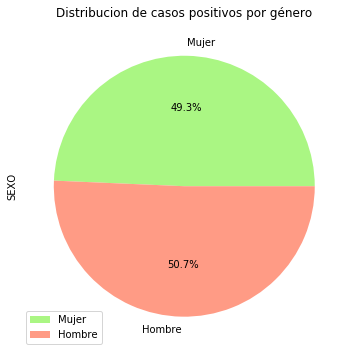

In [140]:
colores = ["#AAF683","#FF9B85"]
positivos.plot(kind='pie', figsize=(10,6), autopct='%1.1f%%',  colors=colores)
plt.title('Distribucion de casos positivos por género')
lab = positivos.values
print(lab)
plt.legend(labels=positivos.index,loc='lower left')
plt.show()

In [16]:
# Agrupamos por genero el resultado del laboratorio de la prueba del COVID

df_total_casos_grupo = df.groupby(['RESULTADO_LAB','SEXO']).size().reset_index(name='TOTAL')
df_total_casos_grupo

,RESULTADO_LAB,SEXO,TOTAL
0,1,1,632832
1,1,2,650392
2,2,1,839003
3,2,2,718171
4,3,1,22508
5,3,2,20938
6,4,1,75141
7,4,2,74696
8,97,1,309592
9,97,2,285678


In [17]:
# Este codigo es para modificar los codigos por su descripcion, en este caso no se puede usar un 
# diccionario porque la estructura usada es un dataframe y no un diccionario
# como en casos anteriores

df_total_casos_grupo['SEXO'] = df_total_casos_grupo['SEXO'].apply(lambda toLabel: 'MUJER' if toLabel==1 else 
                                   ('HOMBRE' if toLabel==2 
                                    else 'NO ESPECIFICADO'))


df_total_casos_grupo['RESULTADO_LAB'] = df_total_casos_grupo['RESULTADO_LAB'].apply(lambda toLabel: 'Positivos' if toLabel==1 else 
                                            ('Negativos' if toLabel==2 else 
                                             ('Pendientes de entregar resultado' if toLabel==3 else
                                             ('Resultado No Adecuado' if toLabel==4 else
                                             ('No Aplica (Caso sin muestra)' if toLabel==97 else 'No Especificado' ) ) )))

In [18]:
df_total_casos_grupo

,RESULTADO_LAB,SEXO,TOTAL
0,Positivos,MUJER,632832
1,Positivos,HOMBRE,650392
2,Negativos,MUJER,839003
3,Negativos,HOMBRE,718171
4,Pendientes de entregar resultado,MUJER,22508
5,Pendientes de entregar resultado,HOMBRE,20938
6,Resultado No Adecuado,MUJER,75141
7,Resultado No Adecuado,HOMBRE,74696
8,No Aplica (Caso sin muestra),MUJER,309592
9,No Aplica (Caso sin muestra),HOMBRE,285678


### Verificar las enfermedades mas comunes de los que dieron positivo a COVID

In [19]:
# Generar una serie de datos llamada enfermedades_covid_positivos de acuerdo a los que 
# direon resultado a covid y que presentan alguna enfermedad  cronica

enfermedades_covid_positivos = pd.Series({
    'Diabetes' : len(df_covid_positivos.query('DIABETES ==1 & RESULTADO_LAB==1')),
    'EPOC' : len(df_covid_positivos.query('EPOC ==1  & RESULTADO_LAB==1')),
    'ASMA' : len(df_covid_positivos.query('ASMA ==1  & RESULTADO_LAB==1')),
    'Inmusupresion' : len(df_covid_positivos.query('INMUSUPR ==1  & RESULTADO_LAB==1')),
    'Hipertension' : len(df_covid_positivos.query('HIPERTENSION ==1  & RESULTADO_LAB==1')),
    'Cardiovascular' : len(df_covid_positivos.query('CARDIOVASCULAR ==1  & RESULTADO_LAB==1')),
    'Obesidad' : len(df_covid_positivos.query('OBESIDAD ==1 & RESULTADO_LAB==1')),
    'Renal' : len(df_covid_positivos.query('RENAL_CRONICA ==1 & RESULTADO_LAB==1')),
    'Tabaquismo' : len(df_covid_positivos.query('TABAQUISMO ==1 & RESULTADO_LAB==1'))
,
})
enfermedades_covid_positivos

Diabetes          185753
EPOC               16631
ASMA               31505
Inmusupresion      12468
Hipertension      239095
Cardiovascular     22900
Obesidad          211172
Renal              22182
Tabaquismo         94879
dtype: int64

In [20]:
# Ordenar el resultado para graficar
enfermedades_covid_positivos.sort_values(ascending=True, inplace=True)
enfermedades_covid_positivos

Inmusupresion      12468
EPOC               16631
Renal              22182
Cardiovascular     22900
ASMA               31505
Tabaquismo         94879
Diabetes          185753
Obesidad          211172
Hipertension      239095
dtype: int64

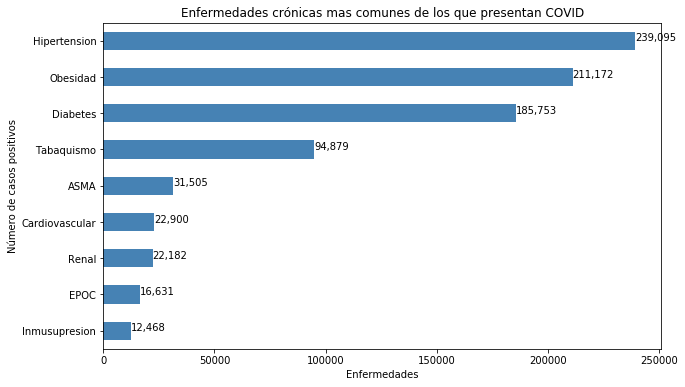

In [122]:
# graficar enfermedades mas comunes de los que presentan COVID
enfermedades_covid_positivos.plot(kind='barh',figsize=(10,6), color='steelblue')
plt.xlabel('Enfermedades')
plt.ylabel('Número de casos positivos')
plt.title('Enfermedades crónicas mas comunes de los que presentan COVID')
for index, value in enumerate(enfermedades_covid_positivos):
    label = format(int(value), ',')
    plt.annotate(label, xy=(value, index), color='black')
    
plt.show()

### Verificar las enfermedades mas comunes de los que fallecieron y dieron positivo a COVID

In [111]:
# Generar una serie de datos llamada enfermedades_covid_positivos de acuerdo a los que 
# direon resultado a covid y que presentan alguna enfermedad  cronica

fallecimientos_covid_positivos = pd.Series({
    'Diabetes' : len(df_covid_positivos.query('DIABETES ==1 & FECHA_DEF != "9999-99-99" & RESULTADO_LAB==1')),
    'EPOC' : len(df_covid_positivos.query('EPOC ==1  & FECHA_DEF != "9999-99-99" & RESULTADO_LAB==1')),
    'ASMA' : len(df_covid_positivos.query('ASMA ==1  & FECHA_DEF != "9999-99-99" & RESULTADO_LAB==1')),
    'Inmusupresion' : len(df_covid_positivos.query('INMUSUPR ==1  & FECHA_DEF != "9999-99-99" & RESULTADO_LAB==1')),
    'Hipertension' : len(df_covid_positivos.query('HIPERTENSION ==1  & FECHA_DEF != "9999-99-99" & RESULTADO_LAB==1')),
    'Cardiovascular' : len(df_covid_positivos.query('CARDIOVASCULAR ==1  & FECHA_DEF != "9999-99-99" & RESULTADO_LAB==1')),
    'Obesidad' : len(df_covid_positivos.query('OBESIDAD ==1 & FECHA_DEF != "9999-99-99" & RESULTADO_LAB==1')),
    'Renal' : len(df_covid_positivos.query('RENAL_CRONICA ==1 & FECHA_DEF != "9999-99-99" & RESULTADO_LAB==1')),
    'Tabaquismo' : len(df_covid_positivos.query('TABAQUISMO ==1 & FECHA_DEF != "9999-99-99" & RESULTADO_LAB==1'))
,
})
fallecimientos_covid_positivos

Diabetes          46374
EPOC               5737
ASMA               2331
Inmusupresion      2889
Hipertension      55391
Cardiovascular     6401
Obesidad          28359
Renal              8814
Tabaquismo         9644
dtype: int64

In [23]:
# Ordenar el resultado para graficar
fallecimientos_covid_positivos.sort_values(ascending=True, inplace=True)
fallecimientos_covid_positivos

ASMA               2331
Inmusupresion      2889
EPOC               5737
Cardiovascular     6401
Renal              8814
Tabaquismo         9644
Obesidad          28359
Diabetes          46374
Hipertension      55391
dtype: int64

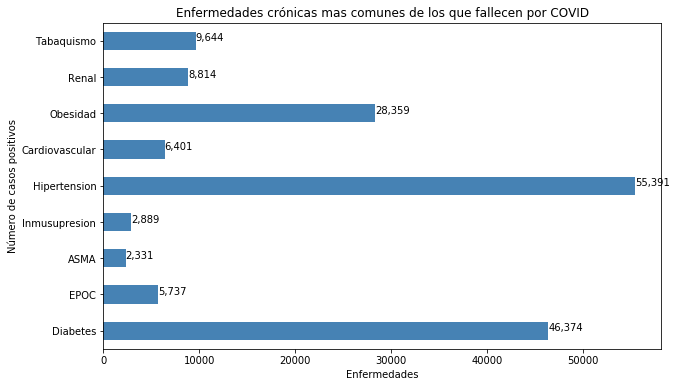

In [143]:
# graficar enfermedades mas comunes de los que presentan COVID
fallecimientos_covid_positivos.plot(kind='barh',figsize=(10,6), color='steelblue')
plt.xlabel('Enfermedades')
plt.ylabel('Número de casos positivos')
plt.title('Enfermedades crónicas mas comunes de los que fallecen por COVID')
for index, value in enumerate(fallecimientos_covid_positivos):
    label = format(int(value), ',')
    plt.annotate(label, xy=(value, index), color='black')
    
 
plt.show()

In [97]:
# Defunciones al 31 Diciembre 2020
defuncionest = df[df['FECHA_DEF'] != '9999-99-99']
defuncionest.shape[0]

175495

In [99]:
defuncionest.head()

,ORIGEN,SECTOR,SEXO,ENTIDAD_NAC,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,NEUMONIA,...,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,TOMA_MUESTRA_LAB,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,UCI
3,1,12,2,12,2,2020-03-31,2020-03-24,2020-04-04,1,1,...,2,2,2,2,1,1,2,97,3,1
8,2,12,2,5,2,2020-04-06,2020-03-31,2020-04-07,1,1,...,1,2,2,2,1,1,2,97,3,1
9,2,4,2,10,2,2020-04-06,2020-03-28,2020-04-12,1,1,...,2,2,2,2,1,1,2,97,3,2
11,2,4,2,20,2,2020-03-30,2020-03-30,2020-04-06,1,1,...,2,1,2,2,1,1,2,97,3,2
18,1,12,2,24,2,2020-04-04,2020-03-31,2020-04-06,1,1,...,2,1,2,2,1,1,2,97,3,1


### Casos Ambulatorios y hospitalizados

In [26]:
tipop = df_covid_positivos['TIPO_PACIENTE'].value_counts()
tipop.rename({1: 'Ambulatorio', 2: 'Hospitalizado'}, inplace=True)
tipop

# de 805,512 positivos a COVID, 617,220 casos son ambulatorios y 188,292 fueron hospitalizados

Ambulatorio      1010407
Hospitalizado     272817
Name: TIPO_PACIENTE, dtype: int64

### Analisis de casos por edad

In [27]:
# Mostrar el numero de casos positivos a covid por edad
# Aqui hay unos que tienen edad = 0 que puede significar un bebe de meses
# Tambien hay valores de personas mayores a 100 años
# Estos valores para la edad asi viene en la base de datos

edad = df_covid_positivos['EDAD'].value_counts(sort=False)
edad

0       2429
1       1434
2       1033
3        957
4       1013
5       1049
6       1248
7       1283
8       1453
9       1586
10      1788
11      2031
12      2296
13      2807
14      3144
15      3812
16      4429
17      5304
18      6784
19      9284
20     11746
21     13265
22     15631
23     18981
24     21589
25     24193
26     26224
27     27529
28     28228
29     28591
       ...  
87      1904
88      1517
89      1222
90      1146
91       792
92       562
93       448
94       370
95       328
96       192
97       155
98       141
99        97
100       74
101       25
102       18
103       17
104        8
105        7
106       11
107        4
108        6
109        7
110        3
112        4
114        2
115        4
116        2
118        2
120        4
Name: EDAD, Length: 117, dtype: int64

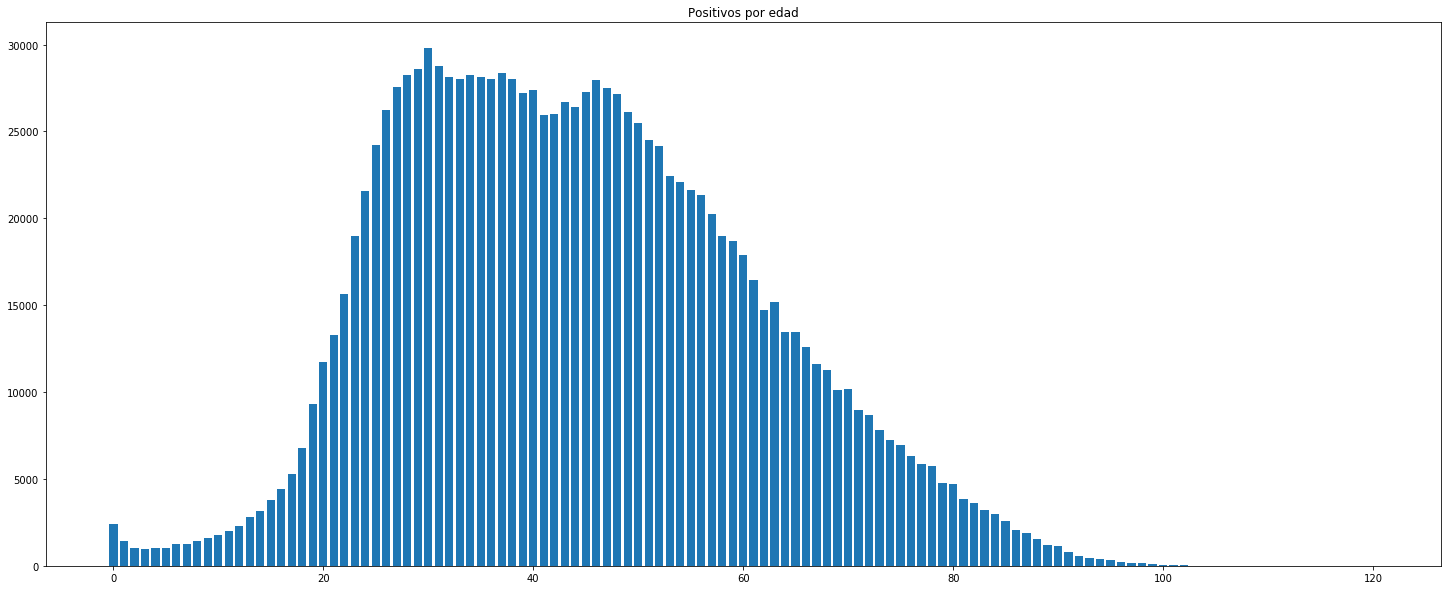

In [132]:
fig, axs = plt.subplots(figsize=(25,10))

axs.bar(edad.index, edad)

axs.set_title('Positivos por edad')


In [29]:
edades_defuncion = df_covid_positivos[(df_covid_positivos.FECHA_DEF != '9999-99-99')]['EDAD'].value_counts().sort_index()

edades_defuncion

0       123
1        62
2        19
3        14
4         6
5         5
6        10
7         7
8         8
9        12
10       13
11        9
12       14
13       12
14       11
15       21
16       24
17       35
18       23
19       38
20       65
21       83
22       84
23       95
24      110
25      143
26      192
27      168
28      211
29      237
       ... 
76     2420
77     2392
78     2374
79     1986
80     2015
81     1666
82     1647
83     1418
84     1335
85     1100
86      968
87      905
88      709
89      546
90      489
91      377
92      233
93      205
94      151
95      130
96       81
97       73
98       37
99       29
100      31
101       7
102       4
103       3
106       1
108       1
Name: EDAD, Length: 106, dtype: int64

Text(0.5, 1.0, 'Defunciones por edad')

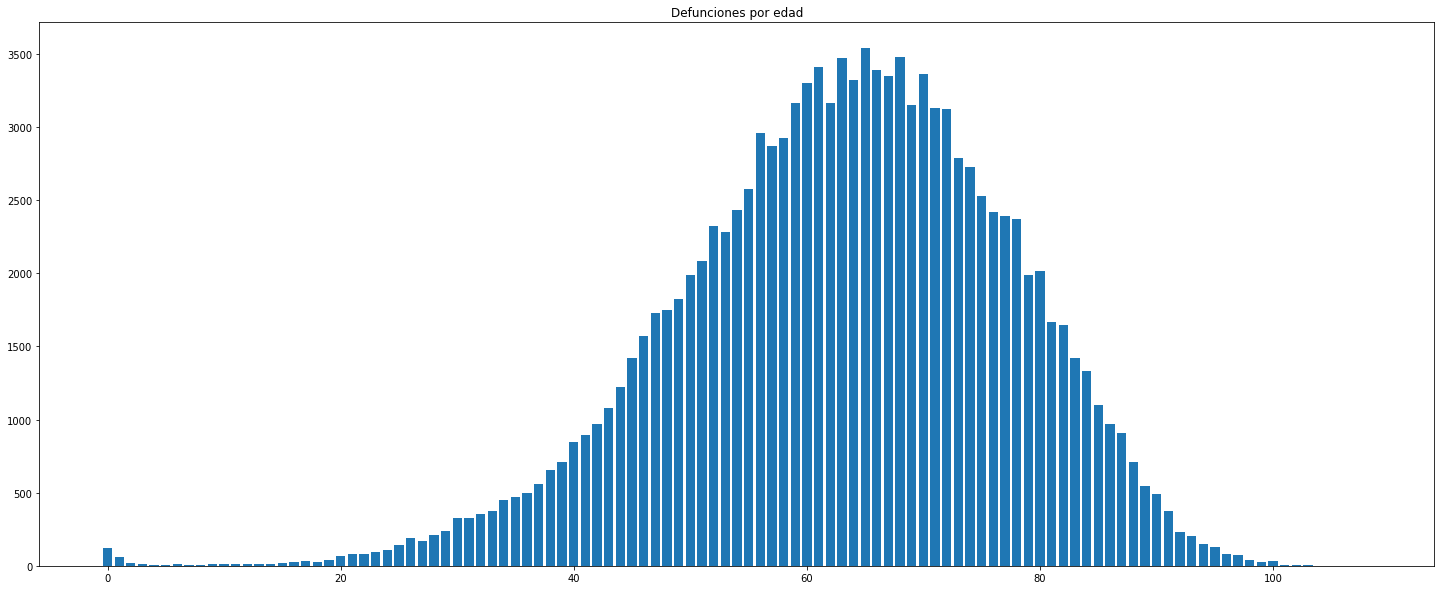

In [146]:
fig, axs = plt.subplots(figsize=(25,10))

axs.bar(edades_defuncion.index, edades_defuncion)

axs.set_title('Defunciones por edad')

### Agrupacion por edades Casos positivos

In [39]:
#Grupo y rangos de edades
bins = [0,10,20,30,40,50,60,70,80,90,100,110,120]
names= ['0-10 años', '11-20 años', '21-30 años', '31-40 años','41-50 años','51-60 años',
        '61-70 años', '71-80 años', '81-90 años','91-100 años','101-110 años','111-120 años']


#df['Rango'] = pd.cut(df['EDAD'],bins,labels=names)
df_covid_positivos['Rango'] = pd.cut(df_covid_positivos['EDAD'],bins,labels=names)

#covidFallecido['Rango'] = pd.cut(covidFallecido['EDAD'],bins,labels=names)
df_covid_positivos


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,ORIGEN,SECTOR,SEXO,ENTIDAD_NAC,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,NEUMONIA,...,OBESIDAD,RENAL_CRONICA,TABAQUISMO,TOMA_MUESTRA_LAB,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,UCI,Rango
0,2,4,2,23,1,2020-03-30,2020-03-20,9999-99-99,97,2,...,2,2,2,1,1,2,97,3,97,31-40 años
1,2,4,1,24,1,2020-04-03,2020-03-30,9999-99-99,97,2,...,2,2,2,1,1,2,97,3,97,61-70 años
2,1,4,2,14,1,2020-04-07,2020-03-30,9999-99-99,97,2,...,2,2,2,1,1,2,97,3,97,31-40 años
3,1,12,2,12,2,2020-03-31,2020-03-24,2020-04-04,1,1,...,2,2,2,1,1,2,97,3,1,21-30 años
4,2,6,2,9,2,2020-04-01,2020-03-26,9999-99-99,2,2,...,2,2,2,1,1,2,97,3,2,41-50 años
5,2,12,1,32,1,2020-03-27,2020-03-25,9999-99-99,97,2,...,2,2,2,1,1,2,97,3,97,21-30 años
6,2,9,1,9,2,2020-03-28,2020-03-25,9999-99-99,2,1,...,2,2,2,1,1,2,97,3,2,31-40 años
7,1,4,1,2,1,2020-04-03,2020-03-25,9999-99-99,97,2,...,2,2,2,1,1,2,97,3,97,21-30 años
8,2,12,2,5,2,2020-04-06,2020-03-31,2020-04-07,1,1,...,2,2,2,1,1,2,97,3,1,51-60 años
9,2,4,2,10,2,2020-04-06,2020-03-28,2020-04-12,1,1,...,2,2,2,1,1,2,97,3,2,41-50 años


In [85]:
df_rangos = df_covid_positivos.groupby(['Rango']).size().reset_index(name='Total')
df_rangos

,Rango,Total
0,0-10 años,12844
1,11-20 años,51637
2,21-30 años,234028
3,31-40 años,280233
4,41-50 años,266554
5,51-60 años,211938
6,61-70 años,129069
7,71-80 años,67099
8,81-90 años,24110
9,91-100 años,3159


In [88]:
df_rangos.set_index('Rango')
df_rangos = df_rangos.set_index('Rango')
# df_rangosM = df_rangosM.iloc[0:,1]
df_rangos = df_rangos.iloc[0:,-1]
df_rangos

Rango
0-10 años        12844
11-20 años       51637
21-30 años      234028
31-40 años      280233
41-50 años      266554
51-60 años      211938
61-70 años      129069
71-80 años       67099
81-90 años       24110
91-100 años       3159
101-110 años       106
111-120 años        18
Name: Total, dtype: int64

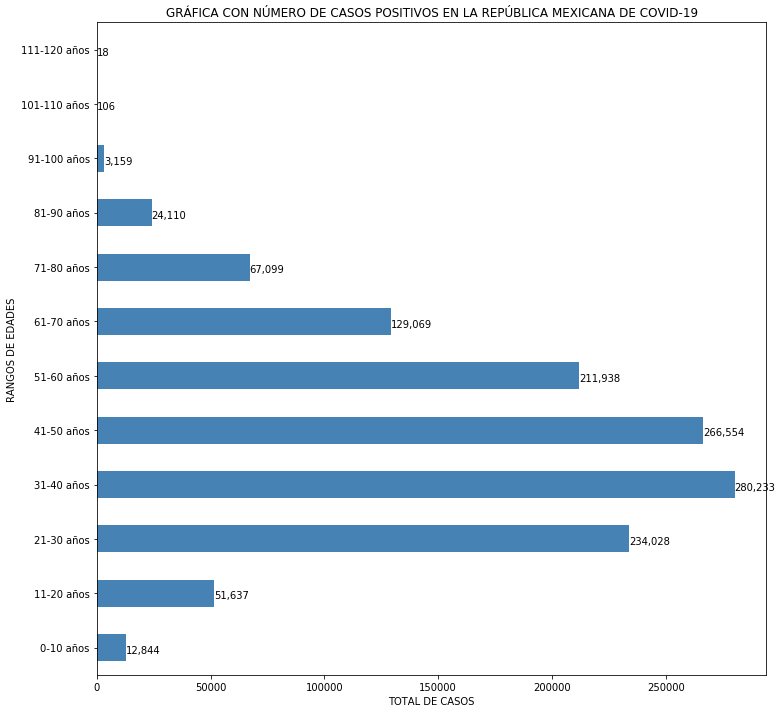

In [95]:
df_rangos.plot(kind='barh',figsize=(12,12),color='steelblue')
plt.xlabel('TOTAL DE CASOS')
plt.ylabel('RANGOS DE EDADES')
plt.title('GRÁFICA CON NÚMERO DE CASOS POSITIVOS EN LA REPÚBLICA MEXICANA DE COVID-19')
for index, value in enumerate(df_rangos):
    #plt.text(value, index, str(value)) 
    label = format(int(value), ',')
    plt.annotate(label, xy=(value, index - 0.10), color='black')

plt.show()

### Agrupacion por edades Defunciones

In [101]:
#df['Rango'] = pd.cut(df['EDAD'],bins,labels=names)
defuncionest['Rango'] = pd.cut(defuncionest['EDAD'],bins,labels=names)

#covidFallecido['Rango'] = pd.cut(covidFallecido['EDAD'],bins,labels=names)
defuncionest

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,ORIGEN,SECTOR,SEXO,ENTIDAD_NAC,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,NEUMONIA,...,OBESIDAD,RENAL_CRONICA,TABAQUISMO,TOMA_MUESTRA_LAB,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,UCI,Rango
3,1,12,2,12,2,2020-03-31,2020-03-24,2020-04-04,1,1,...,2,2,2,1,1,2,97,3,1,21-30 años
8,2,12,2,5,2,2020-04-06,2020-03-31,2020-04-07,1,1,...,2,2,2,1,1,2,97,3,1,51-60 años
9,2,4,2,10,2,2020-04-06,2020-03-28,2020-04-12,1,1,...,2,2,2,1,1,2,97,3,2,41-50 años
11,2,4,2,20,2,2020-03-30,2020-03-30,2020-04-06,1,1,...,1,2,2,1,1,2,97,3,2,31-40 años
18,1,12,2,24,2,2020-04-04,2020-03-31,2020-04-06,1,1,...,1,2,2,1,1,2,97,3,1,51-60 años
24,2,6,2,9,2,2020-03-27,2020-03-20,2020-04-18,1,1,...,2,2,1,1,1,2,97,3,1,51-60 años
26,1,4,2,9,2,2020-03-26,2020-03-26,2020-04-02,2,2,...,2,2,2,1,1,2,97,3,2,91-100 años
34,2,4,2,9,2,2020-03-26,2020-03-26,2020-03-30,2,1,...,2,1,2,1,1,2,97,3,1,51-60 años
35,1,4,2,15,2,2020-03-28,2020-03-28,2020-04-02,2,1,...,2,2,2,1,1,2,97,3,2,41-50 años
38,1,12,2,9,1,2020-03-29,2020-03-25,2020-04-05,97,1,...,2,2,2,1,1,2,97,3,97,51-60 años


In [106]:
df_rangos2 = defuncionest.groupby(['Rango']).size().reset_index(name='Total')
df_rangos2

,Rango,Total
0,0-10 años,650
1,11-20 años,694
2,21-30 años,3092
3,31-40 años,8181
4,41-50 años,21056
5,51-60 años,38227
6,61-70 años,47756
7,71-80 años,36741
8,81-90 años,16337
9,91-100 años,2253


In [107]:
df_rangos2.set_index('Rango')
df_rangos2 = df_rangos2.set_index('Rango')
# df_rangosM = df_rangosM.iloc[0:,1]
df_rangos2 = df_rangos2.iloc[0:,-1]
df_rangos2

Rango
0-10 años         650
11-20 años        694
21-30 años       3092
31-40 años       8181
41-50 años      21056
51-60 años      38227
61-70 años      47756
71-80 años      36741
81-90 años      16337
91-100 años      2253
101-110 años       27
111-120 años        1
Name: Total, dtype: int64

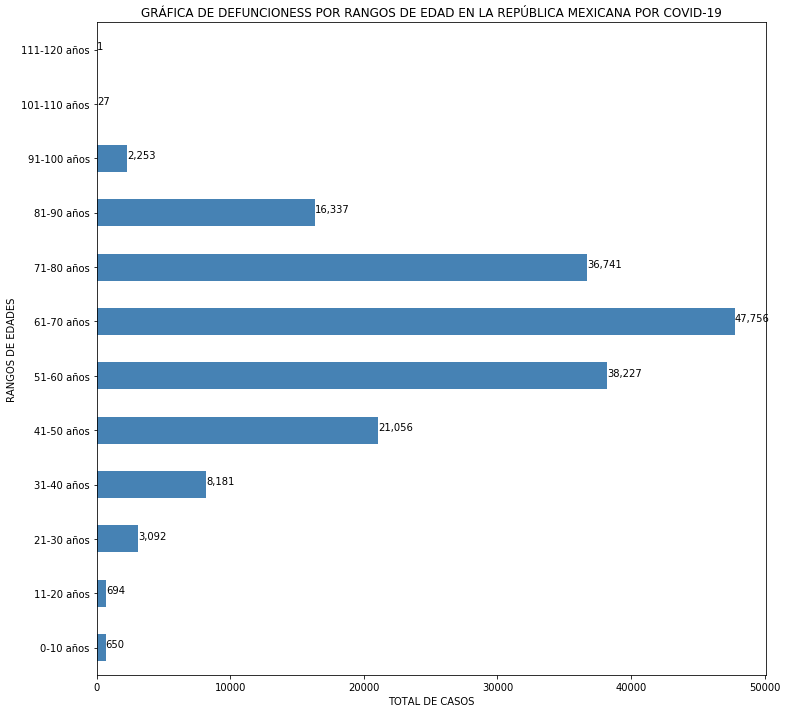

In [110]:
df_rangos2.plot(kind='barh',figsize=(12,12),color='steelblue')
plt.xlabel('TOTAL DE CASOS')
plt.ylabel('RANGOS DE EDADES')
plt.title('GRÁFICA DE DEFUNCIONESS POR RANGOS DE EDAD EN LA REPÚBLICA MEXICANA POR COVID-19')
for index, value in enumerate(df_rangos2):
    #plt.text(value, index, str(value)) 
    label = format(int(value), ',')
    plt.annotate(label, xy=(value, index ), color='black')

plt.show()




## Número de casos verificados por estado

In [31]:
# Creamos un diccionario de datos con las claves de las entidades para poder
# generar reporte donde se muestre el numero de casos por entidad

dic_estados = {1: 'Aguscalientes', 2: 'Baja California', 3:'Baja California Sur', 
               4: 'Campeche', 5: 'Coahuila de zaragoza', 6: 'Colima', 7: 'Chiapas',
              8: 'Chihuahua', 9: 'Ciudad de México', 10: 'Durango', 11: 'Guanajuato',
              12: 'Guerrero', 13: 'Hidalgo', 14: 'Jalisco', 15: 'México', 
               16: 'Michoacan de Ocampo', 17: 'Morelos', 18:'Nayarit', 19: 'Nuevo León',
              20: 'Oaxaca', 21: 'Puebla', 22: 'Querétaro', 23: 'Quintan Roo', 
              24: 'San Luis Potosí', 25: 'Sinaloa', 26: 'Sonora', 27: 'Tabasco',
              28: 'Tamaulipas', 29: 'Tlaxcala', 30: 'Veracruz de Ignacio de la llave',
              31: 'Yucatan', 32: 'Zacatecas', 99: 'No especificado'}

In [32]:
casos_por_estado = df['ENTIDAD_NAC'].value_counts(sort=False)

# Con un diccionario de datos ponemos etiquetas a los codigos en base a los valores usados en el
# catalogo,  disponible en      https://www.gob.mx/salud/documentos/datos-abiertos-152127 

casos_por_estado.rename( dic_estados, inplace=True)
casos_por_estado.head(10)

Aguscalientes             49732
Baja California           52377
Baja California Sur       31745
Campeche                  22266
Coahuila de zaragoza     119944
Colima                    14116
Chiapas                   57974
Chihuahua                 58926
Ciudad de México        1004617
Durango                   62723
Name: ENTIDAD_NAC, dtype: int64

In [33]:
# Ordenar el resultado para graficar y mostrar los primeros 10
casos_por_estado.sort_values(ascending=True, inplace=True)
casos_por_estado.head(10)

Colima                 14116
No especificado        17471
Quintan Roo            17525
Campeche               22266
Nayarit                23679
Morelos                26802
Baja California Sur    31745
Tlaxcala               35707
Querétaro              42655
Zacatecas              48628
Name: ENTIDAD_NAC, dtype: int64

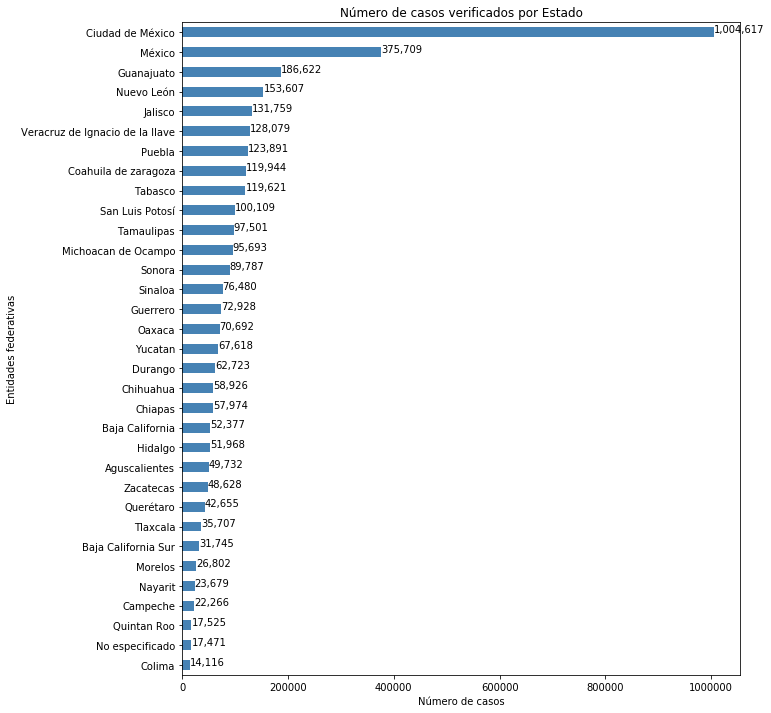

In [147]:
# graficar el numero de casos registrados o analizados para COVID
casos_por_estado.plot(kind='barh',figsize=(10,12), color='steelblue')
plt.xlabel('Número de casos')
plt.ylabel('Entidades federativas')
plt.title('Número de casos verificados por Estado')
for index, value in enumerate(casos_por_estado):
    label = format(int(value), ',')
    plt.annotate(label, xy=(value, index), color='black')
    
plt.show()

## Número de casos positivos por estado

In [35]:
positivos_por_estado = df_covid_positivos['ENTIDAD_NAC'].value_counts(sort=False)

# Con un diccionario de datos ponemos etiquetas a los codigos en base a los valores usados en el
# catalogo,  disponible en      https://www.gob.mx/salud/documentos/datos-abiertos-152127 
positivos_por_estado.rename( dic_estados, inplace=True)
positivos_por_estado

Aguscalientes                       15518
Baja California                     19757
Baja California Sur                 11405
Campeche                             6892
Coahuila de zaragoza                49310
Colima                               5943
Chiapas                             12062
Chihuahua                           28935
Ciudad de México                   251817
Durango                             27249
Guanajuato                          80070
Guerrero                            32962
Hidalgo                             23868
Jalisco                             52188
México                             117250
Michoacan de Ocampo                 37815
Morelos                              9472
Nayarit                              8868
Nuevo León                          65876
Oaxaca                              36239
Puebla                              47956
Querétaro                           20373
Quintan Roo                          7025
San Luis Potosí                   

In [36]:
df_covid_positivos

,ORIGEN,SECTOR,SEXO,ENTIDAD_NAC,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,NEUMONIA,...,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,TOMA_MUESTRA_LAB,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,UCI
0,2,4,2,23,1,2020-03-30,2020-03-20,9999-99-99,97,2,...,2,2,2,2,1,1,2,97,3,97
1,2,4,1,24,1,2020-04-03,2020-03-30,9999-99-99,97,2,...,2,2,2,2,1,1,2,97,3,97
2,1,4,2,14,1,2020-04-07,2020-03-30,9999-99-99,97,2,...,2,2,2,2,1,1,2,97,3,97
3,1,12,2,12,2,2020-03-31,2020-03-24,2020-04-04,1,1,...,2,2,2,2,1,1,2,97,3,1
4,2,6,2,9,2,2020-04-01,2020-03-26,9999-99-99,2,2,...,2,2,2,2,1,1,2,97,3,2
5,2,12,1,32,1,2020-03-27,2020-03-25,9999-99-99,97,2,...,2,2,2,2,1,1,2,97,3,97
6,2,9,1,9,2,2020-03-28,2020-03-25,9999-99-99,2,1,...,2,2,2,2,1,1,2,97,3,2
7,1,4,1,2,1,2020-04-03,2020-03-25,9999-99-99,97,2,...,2,2,2,2,1,1,2,97,3,97
8,2,12,2,5,2,2020-04-06,2020-03-31,2020-04-07,1,1,...,1,2,2,2,1,1,2,97,3,1
9,2,4,2,10,2,2020-04-06,2020-03-28,2020-04-12,1,1,...,2,2,2,2,1,1,2,97,3,2


In [37]:
# Ordenar el resultado para graficar y mostrar los primeros 10
positivos_por_estado.sort_values(ascending=True, inplace=True)
positivos_por_estado #.head(10)

No especificado                      4382
Colima                               5943
Campeche                             6892
Quintan Roo                          7025
Nayarit                              8868
Morelos                              9472
Baja California Sur                 11405
Tlaxcala                            11655
Chiapas                             12062
Aguscalientes                       15518
Baja California                     19757
Querétaro                           20373
Zacatecas                           23384
Hidalgo                             23868
Yucatan                             26664
Durango                             27249
Chihuahua                           28935
Sinaloa                             32600
Guerrero                            32962
Oaxaca                              36239
Sonora                              36273
Tamaulipas                          37334
Michoacan de Ocampo                 37815
Tabasco                           

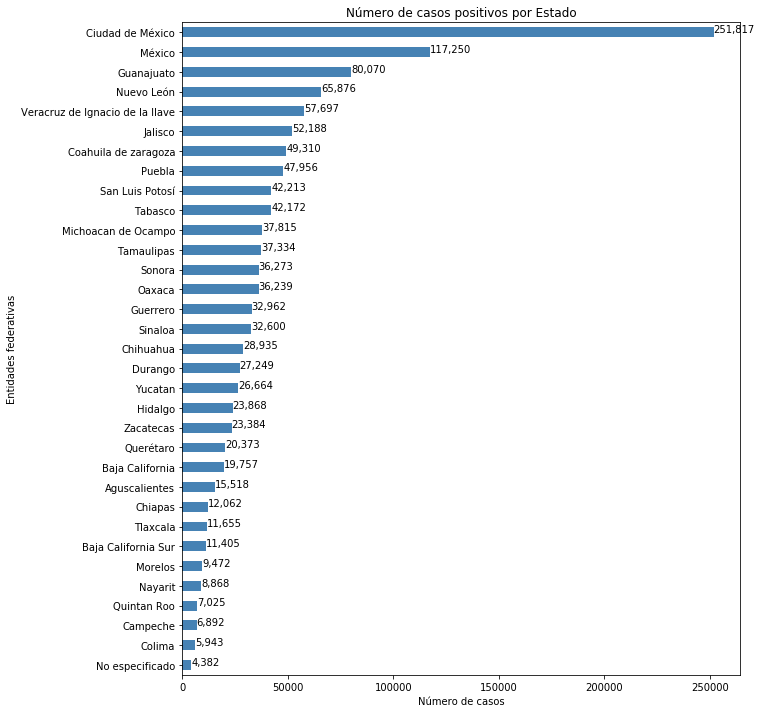

In [148]:
# graficar el numero de casos registrados o analizados para COVID
positivos_por_estado.plot(kind='barh',figsize=(10,12), color='steelblue')
plt.xlabel('Número de casos')
plt.ylabel('Entidades federativas')
plt.title('Número de casos positivos por Estado')
for index, value in enumerate(positivos_por_estado):
    label = format(int(value), ',')
    plt.annotate(label, xy=(value, index), color='black')
    
plt.show()